### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### Load data

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
sample_submission = pd.read_csv("../data/sample_submission.csv")

print(train.shape, test.shape, sample_submission.shape)
train.head()


(30676, 12) (13148, 11) (13148, 2)


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


### Preprocess data

In [3]:
# Convert datetime
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])


for df in [train, test]:
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['dayofweek'] = df['datetime'].dt.dayofweek


In [4]:
print(train.columns)


Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5', 'year', 'month', 'day', 'hour',
       'dayofweek'],
      dtype='object')


### Define features and target

In [6]:
from sklearn.model_selection import train_test_split

train = train.dropna(subset=['pm2.5'])

X = train.drop(columns=['pm2.5', 'datetime', 'No'], errors='ignore')
y = train['pm2.5']

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shapes:")
print("X_train:", X_train.shape, "X_valid:", X_valid.shape)
print("y_train:", y_train.shape, "y_valid:", y_valid.shape)


Shapes:
X_train: (23004, 14) X_valid: (5751, 14)
y_train: (23004,) y_valid: (5751,)


### Train a Baseline Model (Linear Regression)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_valid)

mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)

print("Linear Regression RMSE:", rmse)


Linear Regression RMSE: 77.76808734390757


### Try a More Powerful Model (Random Forest)

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_valid)

mse_rf = mean_squared_error(y_valid, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest RMSE:", rmse_rf)


Random Forest RMSE: 34.22424152503358


### Train Final Model on All Data

In [9]:

final_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

final_model.fit(X, y)

print("Final model trained on full dataset.")


Final model trained on full dataset.


### Make Predictions on Test Set

In [10]:
X_test = test.drop(columns=['datetime', 'No'], errors='ignore')


test_predictions = final_model.predict(X_test)

print("Predictions ready. Shape:", test_predictions.shape)


Predictions ready. Shape: (13148,)


### Exploratory Data Analysis (EDA) – Time Series Trends

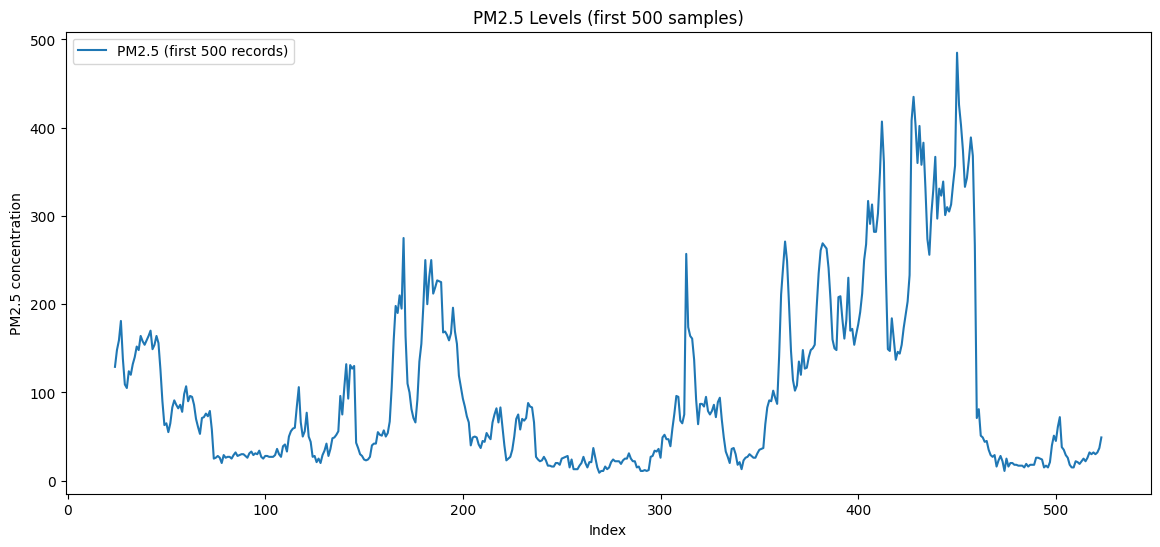

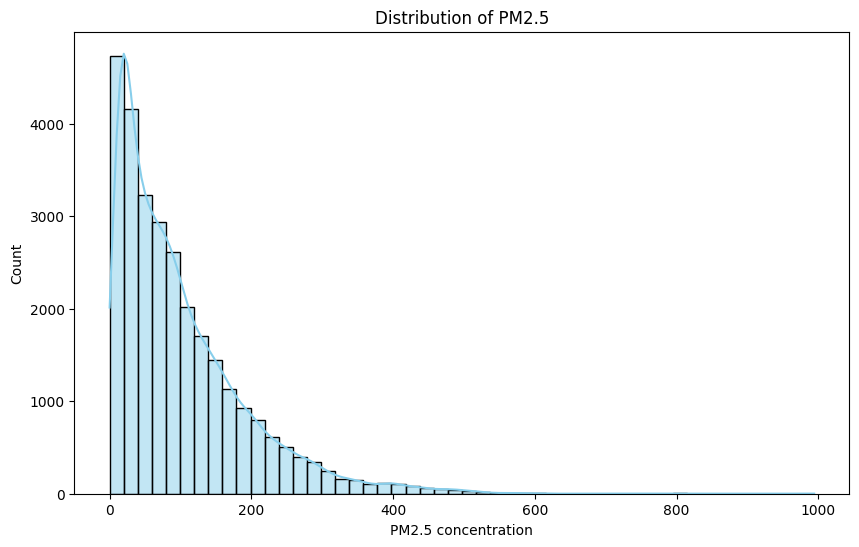

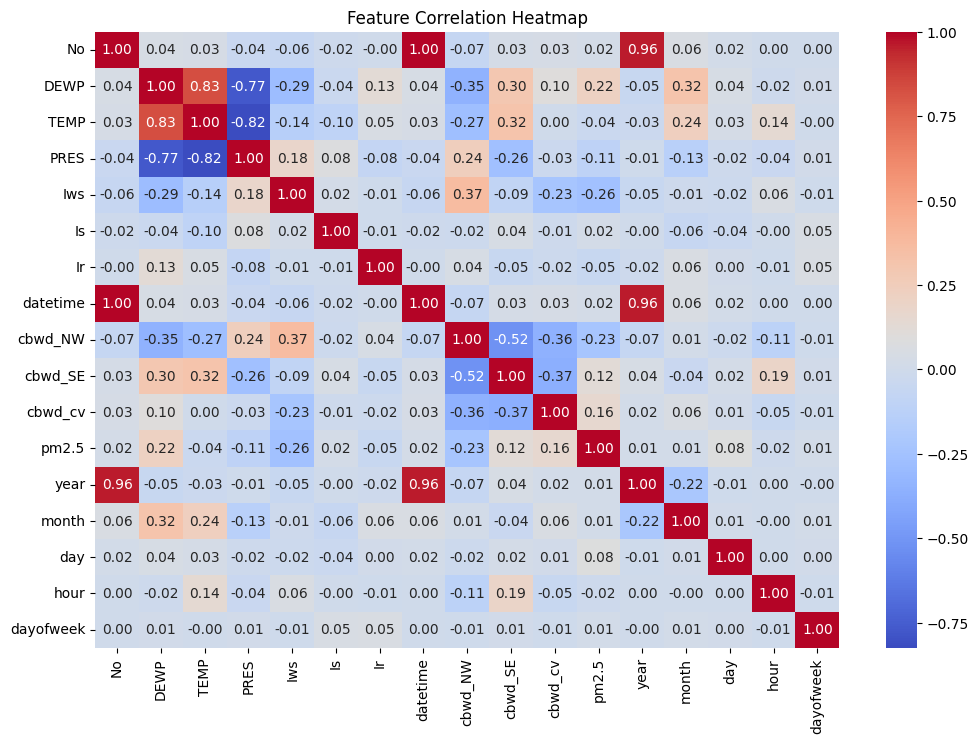

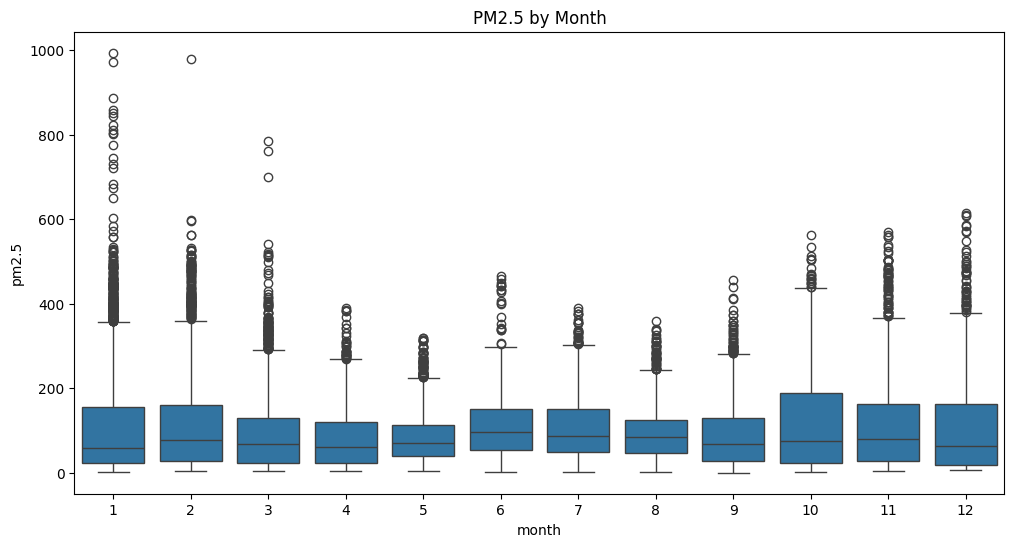

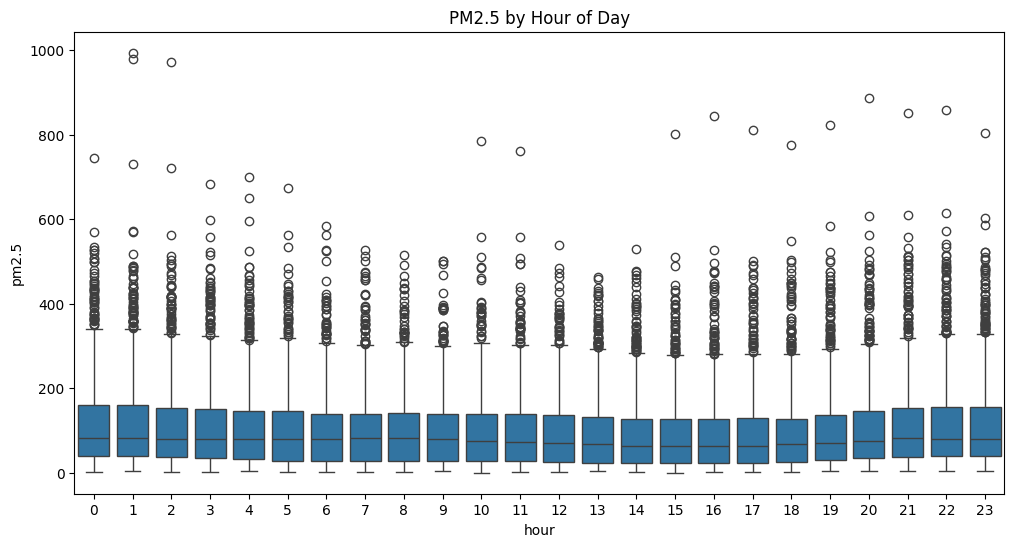

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14,6))
plt.plot(train['pm2.5'][:500], label='PM2.5 (first 500 records)')
plt.xlabel("Index")
plt.ylabel("PM2.5 concentration")
plt.title("PM2.5 Levels (first 500 samples)")
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(train['pm2.5'].dropna(), bins=50, kde=True, color="skyblue")
plt.xlabel("PM2.5 concentration")
plt.title("Distribution of PM2.5")
plt.show()


plt.figure(figsize=(12,8))
corr = train.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='pm2.5', data=train)
plt.title("PM2.5 by Month")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='hour', y='pm2.5', data=train)
plt.title("PM2.5 by Hour of Day")
plt.show()


### Evaluation & Model Comparison

Model Performance Comparison:
               Model       RMSE
0  Linear Regression  77.768087
1      Random Forest  34.224242


/var/folders/xl/tfd_qtks3zv324nb_q5p53ym0000gn/T/ipykernel_34867/662015165.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", palette="viridis")


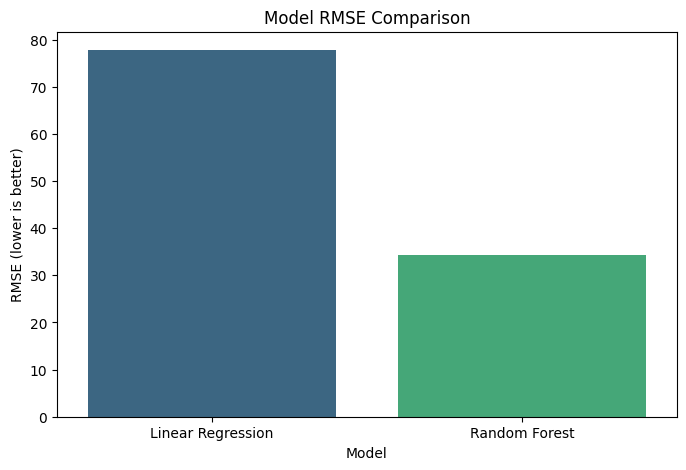

In [21]:
import pandas as pd

results = {
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [77.76808734390757, 34.22424152503358]  
}

results_df = pd.DataFrame(results)

print("Model Performance Comparison:")
print(results_df)

plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="RMSE", palette="viridis")
plt.title("Model RMSE Comparison")
plt.ylabel("RMSE (lower is better)")
plt.show()


### Create Submission File

In [24]:
X_test = test.drop(columns=['No', 'datetime'], errors='ignore')


final_predictions = rf_model.predict(X_test)


submission = pd.DataFrame({
    "Id": test["No"],   # keep 'No' as ID in submission
    "Predicted_PM2.5": final_predictions
})


submission.to_csv("submission.csv", index=False)

print("Submission file created: submission.csv")
submission.head()


Submission file created: submission.csv


,Id,Predicted_PM2.5
0,30677,26.12
1,30678,23.80
2,30679,20.85
3,30680,20.27
4,30681,18.93


### Conclusion

- We trained Two models: Random Forest and Linear Regression.
- Random Forest performed better on training data with higher R² and lower error metrics.
- The final predictions were generated using the Random Forest model.

